## Inicjalizacja środowiska programistycznego

In [1]:
#Color printing
from termcolor import colored

#General data operations library
import math
import string
from datetime import datetime
import numpy as np

#The tensorflow library
import tensorflow  as tf

#Plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt

#Increase plots font size
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

#append path with python modules
import importlib
import sys
sys.path.insert(0, "/scratch/modules")
#Private functions
import plotting_functions as plf
importlib.reload(plf);

import emnist_functions as emnist_fcn
importlib.reload(emnist_fcn);
#Hide GPU
#tf.config.set_visible_devices([], 'GPU')

2025-04-16 09:26:53.694100: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-16 09:26:53.694447: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-16 09:26:53.788898: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-16 09:26:54.014444: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


<br/><br/>
<br/><br/>

<h1 align="center">
 Uczenie maszynowe II
</h1>

<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>

<h1 align="right">
Artur Kalinowski <br>
Uniwersytet Warszawski <br>
Wydział Fizyki <br>    
</h1>

# Warstwa splotowa - ang. convlolution layer.

Analiza obrazu o rozdzielczości 10M pikseli z użyciem sieci w pełni połączonej wymaga

$$
{\huge
(10M +1)\times N_\text{neuronów}
}
$$

wag już w pierwszej warstwie ukrytej. Taka duża liczba wag jest trudna w treningu. W szczególności jest podatna na przetrenowanie, co widać na przykładzie zbioru MNIST.

W 1998 roku zaproponowano architekturę z warstwami współdzielącymi wagi - [LeNet](https://ieeexplore.ieee.org/document/726791).
Warstwy ze współdzieleniem wag są obecnie nazywane warstwami splotowymi, ang. `convolution layer`. Sieci wykorzystujące takie warstwy to
sieci konwolucyjne, ang. `convolution neural network, CNN`

Źródło rysunków: [A guide to convolution arithmetic for deep learning, arXiv:1603.07285](https://arxiv.org/abs/1603.07285)

- **jądro, ang. `kernel/filter`** - zbiór wag wspólny dla całego obrazu. Jądro zwykle ma podstać macierzy kwadratowej.

![image.png](attachment:a80d4b84-8908-453f-acf8-614750de2591.png)

- **pole recepcyjne** - obszar objęty zbiorem różnych wag. Pole recepcyjne przesuwa się po obrazie

![image.png](attachment:6d3f5d70-8c28-48f3-a325-a1b55b4f690b.png)

* **krok, ang. stride** - liczba indeksów o jakie przesuwa się pole recepcyjne. Tutaj `stride=1`

![image.png](attachment:01324755-a74b-4d50-a0f3-73968d0e61e8.png)


* **wypełnienie, ang. padding** - sposób rozszerzenia obrazu w celu uzyskania pożądanego kształtu wyniku warstwy konwolucyjnej, np. zachowania tego samego kształtu dla kolejnych warstw konwolucyjnych. Tutaj: wypełnienie zerami, ang. `zero padding`.

![image.png](attachment:86e8bf6f-92a7-48ba-8368-79b945e99230.png)


* **dylatacja** - odstęp między elementami pola recepcyjnego. Odstęp wynosi `d-1` - czyli brak odstępu odpowiada `d=1`

![image.png](attachment:58c599d0-dd01-42f2-a34d-36fb76798dfc.png)

![image.png](attachment:bb5d8779-bc80-4845-979f-1a2cf681b8ca.png)

Interfejs użytkownika warstwy splotowej w Keras:

```Python
tf.keras.layers.Conv2D(
    filters,                    # liczba filtrów
    kernel_size,                # rozmiar filtra: krotka (n,m), lub (n) dla filtrów kwadratowych
    strides=(1, 1),             # wartość kroku w obu wymiarach
    padding='valid',            # sposób dopełnienia:
                                # `valid` - brak dopełnienia
                                # `same` - dopełnienie zerami na brzegach, tak by wyjście miało ten sam rozmiar
                                #  przestrzenny, co wejście: (batch size, liczba filtrów, H, W).
                                # dopełnienie wynosi połowę rozmiaru filtra w odpowiednim kierunku
    data_format=None,           # specyfikacja kolejności wymiarów:
                                # "channels_first" - (batch size, liczba kanałów, H, W)
                                # "channels_last" - (batch size, H, W, liczba kanałów) <-- domyślne w TF
    dilation_rate=(1, 1),       # dylatacja (n,m) - splot bierze co (n-1, m-1) element w polu recepcyjnym
    groups=1,                   # liczebność grup kanałów, które mają wspólne wagi.
    ...                         # pozostałe, standardowe argumenty warstwy: inicjalizacja wag, regularyzacja, itd.
)
```

**Uwaga:** warstwy w środowisku `Keras` zakładają, że dane wejściowe są podawane w postaci paczek, `batches`.

**Proszę**:

* zbudować warstwę splotową z jednym filtrem o rozmiarze `(3,3)` i pozostałych parametrach z domyślnymi wartościami
* podać na jej wejściu rysunek wypełniony jedynkami o rozmiarze `(16,16)` i jednym kanale kolorów
* wypisać na ekran kształt wejścia i wyjścia warstwy

**Wskazówki:**
* uwaga na kształt danych wejściowych : `(batch size, height, width, channels)`

In [17]:
data = tf.ones((1, 16, 16, 1))*1.0
data = np.full((1, 16, 16, 1), 1.0)
nFilters = 1
kernel_size = (3,3)
layer = tf.keras.layers.Conv2D(filters = nFilters, kernel_size = kernel_size)
print(colored("input shape", "blue"), data.shape)
print(colored("output shape", "blue"), layer(data).shape)


input shape (1, 16, 16, 1)
output shape (1, 14, 14, 1)


**Proszę**:

* zbudować warstwę splotową z jednym filtrem o rozmiarze `(3,3)` i wypełnianiem ustawionym na `same`
* podać na jej wejściu wypełniony jedynkami rysunek o rozmiarze `(16,16)` i jednym kanale kolorów
* wypisać na ekran kształt wejścia i wyjścia warstwy

In [40]:
# data = tf.ones((1, 16, 16, 5))*1.0
data = np.full((1, 16, 16, 5), 1.0)
nFilters = 2
kernel_size = (3,3)
layer = tf.keras.layers.Conv2D(filters = nFilters, kernel_size = kernel_size, padding = 'same')
print(colored("input shape", "blue"), data.shape)
print(colored("output shape", "blue"), layer(data).shape)


input shape (1, 16, 16, 5)
output shape (1, 16, 16, 2)


**Proszę:**

* wydobyć z warstwy splotowej macierz filtra (czyli wagi warstwy) i wypisać ją na ekran

**Wskazówki:**

* wagi warsty są inicjalizowane po pierwszym wykonaniu operacji warstwy:
```Python
layer(data)
print(colored("kernel shape:","blue"),layer.weights[0].shape)
```
* uwaga na kształt danych wejściowych : `(batch, height, width, channels)`
* uwaga na kształt macierzy filtrów

In [42]:
# data = tf.ones((1, 16, 16, 1))*1.0
data = np.full((1, 16, 16, 5), 1.0)
nFilters = 2
kernel_size = (3,3)
layer = tf.keras.layers.Conv2D(filters = nFilters, kernel_size = kernel_size, padding = 'same')
layer(data)
print(colored("kernel shape:","blue"),layer.weights[0].shape)
print(colored("weights:\n","blue"),layer.weights[0].numpy()[:, :, 0, 0])


kernel shape: (3, 3, 5, 2)
weights:
 [[-0.21219942 -0.1296205   0.19743136]
 [-0.17863178  0.06396076 -0.08345397]
 [-0.1269158  -0.01139504 -0.18008487]]


**Proszę:**

* zadać nowy filtr w postaci:

$$
\Large{
\begin{bmatrix}
0 & 1 & 0\\
1 & 0 & 1 \\
0 & 1 & 0
\end{bmatrix}
}
$$
* uruchomić filtr na macierzy `(3,3)` wypełnionej zerami z oboma wariantami wypełniania: `valid` i `same`

**Wskazówki:**
* proszę użyć własnej klasy inicjalizującej wagi na zadaną macierz:
* TF >=2.16.1: proszę użyć własnej klasy inicjalizującej wagi na zadaną macierz:

```Python
kernel_initializer = customInitializer(kernel)
```

* TF <2.16.1: proszę użyć inicjalizatora wag `tf.keras.initializers.Constant(...)`

In [31]:
tf.__version__

'2.15.0'

In [32]:
try:
    class customInitializer(tf.keras.Initializer):
        def __init__(self, kernel):
            self.kernel = kernel

        def __call__(self, shape, dtype=None, **kwargs):
            x = tf.reshape(self.kernel, shape)
            x= tf.cast(x, dtype)
            return x
except AttributeError:
    print(colored("tf.keras.Initializer not available","red"))
    print(colored("TF version:","blue"),tf.__version__)
    pass

tf.keras.Initializer not available
TF version: 2.15.0


In [58]:
"uwaga tutaj afere krece z chatem, bo mam ta stara wersje"
custom_filter = np.array([[0, 1, 0],
                          [1, 0, 1],
                          [0, 1, 0]], dtype=np.float32)

data = np.full((1, 3, 3, 1), 1.0)
# Expand dimensions to match the required shape: (kernel_height, kernel_width, in_channels, out_channels)
# Let's say we're using 1 input channel and 1 output filter for simplicity
custom_filter = custom_filter[:, :, np.newaxis, np.newaxis]

# Use tf.keras.initializers.Constant
initializer = tf.keras.initializers.Constant(custom_filter)

conv = tf.keras.layers.Conv2D(
    filters=1,
    kernel_size=(3, 3),
    kernel_initializer=initializer,
    use_bias=False,
    input_shape=(None, None, 1), # height, width, channels
    padding = 'same',
)
conv(data).shape
conv(data)[0, :, :, 0].numpy()

array([[2., 3., 2.],
       [3., 4., 3.],
       [2., 3., 2.]], dtype=float32)

Przygotujmy rysunek o rozmiarze `(32,32)` z losowo umieszczonymi kwadratami `(3,3)`

Kształty wygenerujemy z użyciem funkcji `skimage.draw.random_shapes`.

Image shape: (32, 32)


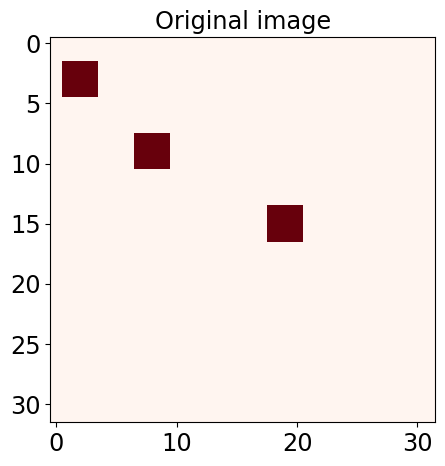

In [65]:
from skimage.draw import random_shapes
result = random_shapes((32, 32), max_shapes=3,
                       shape='rectangle',
                       min_size = 3,
                       max_size = 3,
                       intensity_range = (1,1),
                       channel_axis=None, rng=0)
image, labels = result

#Change colors: background - white, shapes - black
image = np.where(image==255, 0, image).astype(np.float32)
print(colored("Image shape:","blue"),image.shape)

fig, axis = plt.subplots(1, 1, figsize=(5,5))
axis.imshow(image, cmap='Reds')
axis.set_title('Original image');

**Proszę:**

* przygotować warstwy splotowe z dwoma filtrami **w jednej warstwie**:
    * kwadratowym:
$$
\Large{
\begin{bmatrix}
1 & 1 & 1\\
1 & 1 & 1 \\
1 & 1 & 1
\end{bmatrix}
}
$$    
    * liniowym
  $$
\Large{
\begin{bmatrix}
0 & 1 & 0\\
0 & 1 & 0 \\
0 & 1 & 0
\end{bmatrix}
}
$$

In [80]:
filter_1 = np.ones((3, 3), dtype=np.float32)
filter_2 = np.array([0, 1, 0]*3).reshape(3, 3).astype(np.float32)
def get_custom_filter(filter):
    custom_filter = filter[:, :, np.newaxis, np.newaxis]
    return custom_filter

data = np.full((1, 3, 3, 1), 1.0)
conv_filters = [get_custom_filter(x) for x in [filter_1, filter_2]]
conv_filters = np.stack(conv_filters, axis=2)
initializer = tf.keras.initializers.Constant(conv_filters)


**Proszę:**

* wykonać operację warstwy na rysunkach z kwadratami
* narysować oryginalny rysunek i rysunki powstałe na wyjściu obu filtrów

**Wskazówki:**
* uwaga na kształt danych wejściowych - trzeba dodać wymiary `batch` i `channel`
* macierze dla dwu filtrów można uzyskać przez składanie macierzy dla pojedynczych filtrów:
  ```Python
  
  kernel = np.stack( (rect_kernel, linear_kernel), axis=2)
  ```
  <br></br>
* proszę sprawdzić kształt wyniku zwróconego przez warstwę splotową

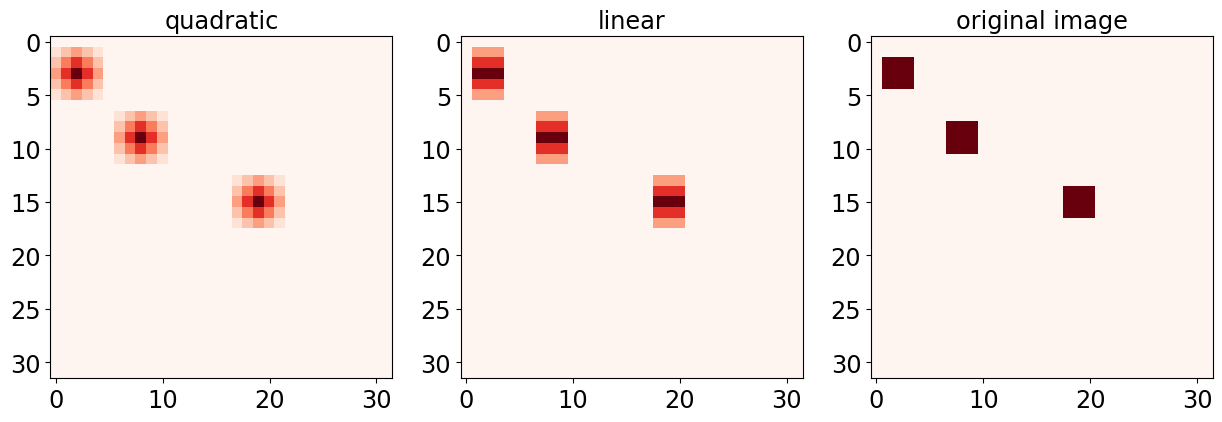

In [81]:

conv = tf.keras.layers.Conv2D(
    filters=2,
    kernel_size=(3, 3),
    kernel_initializer=initializer,
    use_bias=False,
    input_shape=(None, None, 1), # height, width, channels
    padding = 'same',
)
out = conv(image[None, :, :, None])
fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(out[0, :, :, 0], cmap='Reds')
axes[0].set_title('quadratic')
axes[1].imshow(out[0, :, :, 1], cmap='Reds')
axes[1].set_title('linear')
axes[2].imshow(image, cmap='Reds')
axes[2].set_title('original image')
pass

**Proszę:**

* wypisać na ekran maksymalne wartości pikseli dla kanałów wyjściowego obrazu
* narysować wyjściowe obrazy zachowując piksele o wartości powyżej maksymalnej dla kanału z filtrem liniowym. Zachowane piksele proszę ustawić na wartość `1`

**Wskazówki:**
* maksymalną wartość macierzy można uzyskać przez funkcję `tf.math.reduce_max(...).numpy()`
* piksele można ustawić na wartość `1` wypisując warunek logiczny na ich warość:
```Python
layer_output[0,:,:,0]>threshold
```

In [ ]:
...rozwiązanie...
pass

Warstwy splotowe generują nowe obrazy. Zwykle rozdzielczość nowego obrazu jest taka jak obrazu wejściowego, ale liczba kanałów, "kolorów/kanałów" wzrasta.
Redukcja rozdzielczości jest uzyskiwana przez warstwy łączące, ang. `pooling layers`.

Warstwy łączące mają, podobnie jak dla warstwy splotowej, wąskie pole recepcyjne, ale nie mają żadnych wag, czyli parametrów podlegających treningowi - ang. `learning parameters`. Warstwy łączące zawsze wykonują tę samą operację zdefiniowaną dla danej warstwy:

* **masksimum, ang. max pooling** - maksymalna wartość w polu recepcyjnym

![image.png](attachment:f9b36717-778c-4955-b7c0-41f93f07e974.png)

* **średnia, ang. average pooling** - średnia wartość w polu recepcyjnym

![image.png](attachment:7a09b570-6e1d-4276-af7e-ad1ca87027bb.png)

Najbardziej popularna jest warstwa wyciągająca maksimum - `MaxPooling`

Interfejs użytkownika warstwy wyciągającej maksimum w Keras:

```Python
tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),           # rozmiar pola recepcyjnego
    strides=None,               # wartość kroku w obu wymiarach
    padding='valid',            # sposób dopełnienia:
                                # `valid` - brak dopełnienia
                                # `same` - dopełnienie zerami na brzegach, tak by wyjście miało ten sam rozmiar
                                #  przestrzenny, co wejście: (batch size, liczba filtrów, W, H)
    data_format=None,           # specyfikacja kolejności wymiarów:
                                # "channels_first" - (batch size, liczba kanałów, W, H)
                                # "channels_last" - (batch size, W, H, liczba kanałów) <-- domyślne w TF
)
```

**Proszę:**

* wykonać operację `MaxPooling2D` na obrazach wyjściowych z warstwy splotowej z filtrami kwadratowym i liniowym
* użyć domyślnych parametrów warstwy łączącej
* narysować wynik

In [ ]:
...rozwiązanie...
pass

Standardowa architektura sieci analizującej obrazy zawiera przekładaniec warstw splotowych i łączących, zakończony warstwami w pełni połączonymi:

![image.png](attachment:67324852-8771-4ff8-ab5f-9d41eac41319.png)

Zbiór obrazów uzyskany przez poszczególne filtry nazywany jest mapą cech, ang. `feature map`. Filtry są nazywane cechami, `features`.

## Klasa tf.keras.Sequential

Model składający się z sekwencji warstw może być stworzony przy użyciu klasy `tf.keras.Sequential`:
```Python
tf.keras.Sequential(
    layers=None, # lista warstw modelu
    name=None    # nazwa modelu
)
```

### Składanie modelu warstwa po warstwie:

In [ ]:
model = tf.keras.Sequential(name="test_1")
model.add(tf.keras.Input(shape=(16,)))
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dense(16))
model.summary()

### Definicja wielu warstw w jednym kroku:

In [ ]:
model = tf.keras.Sequential(layers = [tf.keras.Input(shape=(16,)),
                                      tf.keras.layers.Dense(16),
                                      tf.keras.layers.Dense(8)],
                             name="test_2")
model.summary()

**Proszę:**

Zbudować, korzystająć z `tf.keras.Sequential()`, sieć splotową o nazwie `CNN_Digits`` i następującej strukturze:

* kształt danych wejściowych: `(28,28,1)`
* 3$\times$ blok:
    * warstwa `Conv2D`, `64` filtry, rozmiar filtra `3`, funkcja aktywacji: `ReLU`, padding: `same`
    * wartwa `MaxPooling`, rozmiar filtra `2`
* warstwa spłaszczająca:
```Python

tf.keras.layers.Flatten()
```

* warstwa gęsta, `128` neuronów, funkcja aktywacji: `ReLU`
* warstwa opuszczająca, z częstością `0.5`
* warstwa gęsta, `64` neuronów, funkcja aktywacji: `ReLU`
* warstwa opuszczająca, z częstością `0.5`
* warstwa wyjściowa dobrana do zagadnienia: **Klasyfikacja ręcznie pisanych cyfr**

Oczekiwany wynik:

![image.png](attachment:4e3bc582-ce9b-446e-8a90-f5dc412984a7.png)

In [ ]:
...rozwiązanie...
pass

**Proszę:**

* załadować zbiór `emnist-digits-test` i podzielić go na części uczącą i testową w proporcjach `3:1`
* wypisać nma ekran kształ danych

In [ ]:
!pip install idx2numpy
!wget https://biometrics.nist.gov/cs_links/EMNIST/gzip.zip
!unzip gzip.zip
!gzip -d gzip/*test*

In [ ]:
...rozwiązanie...
pass

* użyć funkcji  `trainModel(model, features, labels, nEpochs=200)` z modułu `emnist_functions`. Funkcja powinna wykonywać
  kroki związane z treningiem:
    * ustalenie harmonogramu współczynnika uczenia
    * ustalenie wczesnego zatrzymania trenowania na podstawie monitoringu funkcji straty na zbiorze walidacyjnych
        * jako zbioru walidacyjnego używać 10% danych wydzielonych ze zbioru uczącego przez ustawienie parametru
       ```Python
       
        validation_split=0.1
        
        ```
       w wywołaniu metody  `model.fit()`
    * rysowanie zmiany funkcji straty w kolejnych epokach
    * wypisanie na ekran wydajności modelu na zbiorze uczącym
* przeprowadzić trening i sprawdzenie wydajności sieci `CNN_Digits` na zbiorze testowym

In [ ]:
%%time
...rozwiązanie...
pass

**Proszę:**

* narysować osiem losowych przykładów ze zbioru testowego, w których odpowiedź modelu **nie** jest poprawna

In [ ]:
...rozwiązanie...
pass

# Zadanie domowe

Trening klasyfikatora **konwolucyjnego** na zbiorze wielkich liter i cyfr ze zbioru `emnist-byclass-train`.

**Proszę:**

* wczytrać zbióry `emnist-byclass-train` i `emnist-byclass-test`(uwaga pliki są duże i długo ładują się na Colab!)
* wybrać przykłady o numerze klasy mniejszym niż 36, czyli cyfry i wielkie litery
* zdefiniować i przeprowadzić trening modelu. **Do definicji kodelu użyć klasy Sequential.**
* wypisać na ekran dokładność, `accuracy`, modelu na zbiorach treningowym i testowym
* dla zbiorów treningowego i testowego narysować macierze pomyłek z odpowiednimi etykietami na osiach
* wskazać klasy które słabo się separują
* odkodować komunikat zapisany w pliku [encoded.npz](http://studenci.fuw.edu.pl/~akalinow/encoded.npz)
    * plik zawiera macierz o kształcie `(-1,28,28)` którą można wczytać następująco:
    ```Python
    
    fileName = "encoded.npz"
    with open(fileName, 'rb') as file:
        encoded = np.load(file)
    ```
* odkodowany komunikat wypisać na ekran w postaci napisu:
```
Decoded message is: HELLO WORLD

```

**UWAGA**: Kod musi używać funkcji zdefiniowanych w module `emnist_functions`
i działać z przygotowanymi poniżej komórkami. Należy zdefiniować następujące funkcje:
  
* ```emnist_functions.getEMNIST(datasetName, datasetPath)``` - funkcja łądująca dane
* ```emnist_functions.preprocessData(x,y)``` - funkcja wybierająca podzbiór wielkich liter i cyfr
* ```emnist_functions.getConvModel(...)``` - funkcja zwracająca model do treningu.
* ```emnist_functions.trainModel(...)``` - funkcja trenująca i rysująca historię funkcji straty
* ```emnist_functions.plotTrainHistory(history)```
* ```emnist_functions.plotMNIST_CM(y_train,y_pred, label)``` - funkcja rysująca macierz pomyłek. Parametr `label` to napis "Training" lub "Validation"
* ```emnist_functions.decodeMessage(model, encoded)``` - funkcja dekodująca komunikat
* moduł `emnist_functions` powinien zawierać zmienne definiujące sieć:
  
  ```Python
  inputShape = ...
  nNeurons = ...
  lastClassNumber = 36
  nOutputNeurons = ...
  nEpochs = ...
  ```

In [ ]:
#Input data loading
import emnist_functions as emnist_fcn
importlib.reload(emnist_fcn);

datasetName = "emnist-byclass-train"
datasetPath = "../data/EMNIST/gzip/"
lastClassNumber = emnist_fcn.lastClassNumber

x, y = emnist_fcn.getEMNIST(datasetName, datasetPath)
print(colored("Training dataset","green"))
x_train, y_train = emnist_fcn.preprocessData(x,y)

datasetName = "emnist-byclass-test"
datasetPath = "../data/EMNIST/gzip/"
x, y = emnist_fcn.getEMNIST(datasetName, datasetPath)
print(colored("Test dataset","green"))
x_test, y_test = emnist_fcn.preprocessData(x,y)

In [ ]:
#model definition
import emnist_functions as emnist_fcn
importlib.reload(emnist_fcn);

inputShape = emnist_fcn.inputShapeConv
nOutputNeurons = emnist_fcn.nOutputNeurons
model = emnist_fcn.getConvModel(inputShape, nOutputNeurons)
nOutputNeurons = emnist_fcn.nOutputNeurons
model.summary()

In [ ]:
%%time
#model training
nEpochs = emnist_fcn.nEpochs
model = emnist_fcn.trainModel(model, x_train, y_train, nEpochs=nEpochs)

print(colored("Evaluation on test dataset:","blue"))
model.evaluate(x_test, y_test);

In [ ]:
#evaluation
importlib.reload(emnist_fcn);
y_pred = tf.argmax(model.predict(x_train, batch_size=128, verbose=0), axis=1)
emnist_fcn.plotMNIST_CM(y_train, y_pred,"Training")

y_pred = tf.argmax(model.predict(x_test,batch_size=128, verbose=0), axis=1)
emnist_fcn.plotMNIST_CM(y_test, y_pred,"Testing")

In [ ]:
#message decoding
importlib.reload(emnist_fcn);
fileName = "../data/encoded.npz"
with open(fileName, 'rb') as file:
    encoded = np.load(file)

emnist_fcn.decodeMessage(model, encoded)